## Import needed libraries

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Load the CSV file

In [5]:
df = pd.read_csv("loan.csv")

/tmp/ipykernel_233443/2042666052.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("loan.csv")


In [6]:
# Understand the warning and avoid to loose data.
# Get the 47 th Column name and get unique
column_name_47 = df.columns[46]
print("Column 47 name:", column_name_47)

Column 47 name: last_pymnt_amnt


In [7]:
# Get the values in the column
df['last_pymnt_amnt'].unique()

array([171.62, 119.66, 649.91, ...,  80.9 , 281.94, 256.59])

In [8]:
# Reload the csv file with out any warning
df = pd.read_csv("loan.csv", dtype={'last_pymnt_amnt': 'str'}, low_memory=False)

In [9]:
#Print all the columns
cols = df.columns
print(list(cols))

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il

In [10]:
for col in df.columns:
    print(col)

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_il_6m
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc

## Date cleanup

### To analyse further we need to confirm below columns should have correct values.
### Check for any repeatation, NULL or corrupted values
##### id: Unique identifier for each loan record.
##### loan_amnt: Amount of the loan, critical for assessing the size of defaults.
##### loan_status: Indicates whether the loan is current, charged off, or in default, essential for your analysis.
##### int_rate: Interest rate, which can influence borrower behavior and default likelihood.
##### annual_inc: Borrower's annual income, important for assessing repayment capacity.
##### dti: Debt-to-income ratio, a key metric in evaluating the borrower's financial health.
##### delinq_2yrs: Number of delinquencies in the past 2 years, indicating credit risk.
##### home_ownership: Helps understand the borrower's stability, which can affect defaults.
##### grade and sub_grade: Credit grades that can provide insights into borrower risk profiles.
##### emp_length: Employment length can correlate with borrower stability.
##### verification_status: Status of income verification, which can impact lending risk.
##### issue_d: Loan issuance date, useful for time-based analysis of defaults
#### total_pymnt	Payments received to date for total amount funded


In [11]:
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [12]:
# Check for any repeatation of the data with unique ID
print ("unique id ", len(df['id'].unique()))
print("Total loan transcation ", len(df['id']))
print("Check for any null values", df['id'].isnull().sum())

unique id  39717
Total loan transcation  39717
Check for any null values 0


In [13]:
# Check for any repeatation of the data with member_id 
print ("unique id ", len(df['member_id'].unique()))
print("Total loan transcation ", len(df['member_id']))
print("Check for any null values", df['member_id'].isnull().sum())

unique id  39717
Total loan transcation  39717
Check for any null values 0


In [14]:
# loan_amnt
# Check for loan amount beling zero
print("Empty loan amt", df['loan_amnt'].isnull().sum())

print("Check different loan amts given", df['loan_amnt'].value_counts())


Empty loan amt 0
Check different loan amts given loan_amnt
10000    2833
12000    2334
5000     2051
6000     1908
15000    1895
         ... 
22875       1
8175        1
19475       1
21225       1
22550       1
Name: count, Length: 885, dtype: int64


In [15]:
print("Different loan status", df['loan_status'].value_counts())
print("\n\nEmpy loan status ", df['loan_status'].isnull().sum())

print("\n\nunique loan status", df['loan_status'].unique())

Different loan status loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64


Empy loan status  0


unique loan status ['Fully Paid' 'Charged Off' 'Current']


In [223]:
# Let us perform the isnull on all the needed columns at one shot
df1 = df

# Check the columns which are null and also I want to exclude columns which dont have any value in the column.
for col in cols:
    null_count = df[col].isnull().sum()
    null_percetnage = round((null_count/len(df['id'])) * 100, 2)
    if(null_count != 0 and null_count != len(df['id'])):
        print(f"Column '{col}' = {null_count} 'perctage : ' {null_percetnage}")

Column 'desc' = 12942 'perctage : ' 32.59
Column 'title' = 11 'perctage : ' 0.03
Column 'next_pymnt_d' = 38577 'perctage : ' 97.13
Column 'last_credit_pull_d' = 2 'perctage : ' 0.01
Column 'collections_12_mths_ex_med' = 56 'perctage : ' 0.14


In [79]:
# lets analyse the not null data from above list.

In [80]:
print(df['emp_title'].unique())
print(df['emp_title'].value_counts())

[nan 'Ryder' 'AIR RESOURCES BOARD' ... 'FiSite Research'
 'Squarewave Solutions, Ltd.' 'Evergreen Center']
emp_title
US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: count, Length: 28820, dtype: int64


In [126]:
# Percentage of the 'emp_title' is null
len(df1[df1['emp_title'].isnull()])/len(df1['id'])*100

6.191303472064859

In [142]:
df_emp_null_defaults = df1[(df1['emp_title'].isnull()) & (df1['loan_status'].isin(['Charged Off']))]
len(df_emp_null_defaults)/len(df1['emp_title'].isnull())*100

1.2186217488732785

In [147]:
# Since not having employment data is important for us to take decission.
# Dont remove the rows, better fill with other place holder
df1['emp_title'] = df1['emp_title'].fillna('No_emp_info')


In [169]:
df_default_emp_length = df1[df1['emp_length'].isnull() & (df1['loan_status'].isin(['Charged Off'])) & (df1['emp_title'].isin(['No_emp_info']))]
len(df_default_emp_length)


216

In [170]:
df1['emp_length'].value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [81]:
# Looking at the term in month, let us convert it to intiger
df['term'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: term
Non-Null Count  Dtype
--------------  -----
39717 non-null  int64
dtypes: int64(1)
memory usage: 310.4 KB


In [171]:
df1['emp_length'] = df1['emp_length'].fillna('No_emp_length')

In [188]:
# mths_since_last_delinq and mths_since_last_record records mostly missing fillinf them can impact our analysis heavily
# Still check them to understand
df1['mths_since_last_delinq'].value_counts()
#df1['mths_since_last_delinq'].mode()[0]
df1['mths_since_last_delinq'] = df1['mths_since_last_delinq'].fillna(df1['mths_since_last_delinq'].mode()[0])
df1['mths_since_last_delinq'].isnull().sum()

0

In [189]:
df1['mths_since_last_record'].value_counts()
df1['mths_since_last_record'] = df1['mths_since_last_record'].fillna(df1['mths_since_last_record'].mode()[0])

In [203]:
# Updating to p50 to fill the nulls
df1['revol_util'] = df1['revol_util'].apply(lambda x: float(str(x).rstrip('%')))
df1['revol_util'] =  df1['revol_util'].fillna(df1['revol_util'].quantile(0.5))

In [206]:
# fill null values of last payment date with mostly occured 
df1['last_pymnt_d'] = df1['last_pymnt_d'].fillna(df1['last_pymnt_d'].mode()[0]) 

In [224]:
df1['chargeoff_within_12_mths'].value_counts() + df1['chargeoff_within_12_mths'].isnull().sum()
df1['chargeoff_within_12_mths'] = df1['chargeoff_within_12_mths'].fillna(df1['chargeoff_within_12_mths'].mode()[0])
df1['chargeoff_within_12_mths'].value_counts()

chargeoff_within_12_mths
0.0    39717
Name: count, dtype: int64

In [235]:
df1['collections_12_mths_ex_med'].value_counts()
df1['collections_12_mths_ex_med'].isnull().sum()

df1['collections_12_mths_ex_med'] = df1['collections_12_mths_ex_med'].fillna(df1['collections_12_mths_ex_med'].mode()[0])

In [241]:
df1['last_credit_pull_d'] = df1['last_credit_pull_d'].fillna(df1['last_credit_pull_d'].mode()[0])

In [242]:
df1['pub_rec_bankruptcies'].value_counts()
df1['pub_rec_bankruptcies'] = df1['pub_rec_bankruptcies'].fillna(df1['pub_rec_bankruptcies'].mode()[0]) 

In [243]:
df1['tax_liens'].value_counts()
df1['tax_liens'] = df1['tax_liens'].fillna(df1['tax_liens'].mode()[0])

In [244]:
# ignore this
df1[df1['next_pymnt_d'].isnull()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,expected_return,not_paid_amt,total_pymnt1
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,5863.32,0.16,5863.155187
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,3589.80,2581.09,1008.710000
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,3035.88,30.21,3005.666844
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,12215.16,-16.73,12231.890000
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,5632.56,0.35,5632.210000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36,8.07,78.42,A,A4,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,2823.12,0.15,2822.969293
39713,90665,90607,8500,8500,875.0,36,10.28,275.38,C,C1,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,9913.68,0.19,9913.491822
39714,90395,90390,5000,5000,1325.0,36,8.07,156.84,A,A4,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,5646.24,374.08,5272.161128
39715,90376,89243,5000,5000,650.0,36,7.43,155.38,A,A2,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,5593.68,419.48,5174.198551


In [245]:
df['term'].value_counts()

term
36    29096
60    10621
Name: count, dtype: int64

In [246]:
df1['term'] = df['term'].apply(lambda x: int(str(x).replace(' months', '')))

In [247]:
df1['term'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: term
Non-Null Count  Dtype
--------------  -----
39717 non-null  int64
dtypes: int64(1)
memory usage: 310.4 KB


In [248]:
#Remove perentage in int_rate
df1['int_rate'] = df1['int_rate'].apply(lambda x: str(x).rstrip('%'))
df1['int_rate'] = df1['int_rate'].apply(lambda x: float(x))
df1['int_rate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: int_rate
Non-Null Count  Dtype  
--------------  -----  
39717 non-null  float64
dtypes: float64(1)
memory usage: 310.4 KB


### Check the data after cleanup and check for anything missing

In [249]:
# Check the columns which are null and also I want to exclude columns which dont have any value in the column.
for col in cols:
    null_count = df[col].isnull().sum()
    null_percetnage = round((null_count/len(df['id'])) * 100, 2)
    if(null_count != 0 and null_count != len(df['id'])):
        print(f"Column '{col}' = {null_count} 'perctage : ' {null_percetnage}")

Column 'desc' = 12942 'perctage : ' 32.59
Column 'title' = 11 'perctage : ' 0.03
Column 'next_pymnt_d' = 38577 'perctage : ' 97.13


In [86]:
df1.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,Full_ret_amt,expected_return,not paid amt,not_paid_amt
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,0.0,0.0,NaN,NaN,NaN,NaN,5863.32,5863.32,0.164813,0.164813
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,0.0,0.0,NaN,NaN,NaN,NaN,3589.80,3589.80,2581.090000,2581.090000
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,0.0,0.0,NaN,NaN,NaN,NaN,3035.88,3035.88,30.213156,30.213156
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,0.0,0.0,NaN,NaN,NaN,NaN,12215.16,12215.16,-16.730000,-16.730000
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,0.0,0.0,NaN,NaN,NaN,NaN,4067.40,4067.40,554.070000,554.070000


### ---------------------------------
### Data looks fine with all the needed values filled and we can go ahead for univariate analysis
### ---------------------------------

In [263]:
# Understand the current buisness profti/loss

# total funded amount
total_funded = df1['funded_amnt'].sum()

# total amount which firm will get in return, add it as new column
df1['expected_return'] = df1['installment'] * df1['term'] 

# Calculate the total amount repaid
total_repaid = df1['total_pymnt'].sum()

print(f"Total Amount Funded: {total_funded}")
print(f"Total Amount Repaid: {total_repaid}")
print(f"Total Amount expected: {df1['expected_return'].sum()}")

Total Amount Funded: 434810325
Total Amount Repaid: 482704394.30999994
Total Amount expected: 555780868.56


In [251]:
# Add one more column for the diff between expected repayment and repaid in defaults

df1['not_paid_amt'] = df1['expected_return'] - df1['total_pymnt']
df1['total_pymnt1'] = df1['total_pymnt']

In [252]:
df1['not_paid_amt'] = df1['not_paid_amt'].round(2)
df1['total_pymnt'] = df1['total_pymnt'].round(2)
df1['expected_return'] = df1['expected_return'].round(2)

In [253]:
df1.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,expected_return,not_paid_amt,total_pymnt1
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,5863.32,0.16,5863.16
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,3589.80,2581.09,1008.71
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,3035.88,30.21,3005.67
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,12215.16,-16.73,12231.89
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,4067.40,554.07,3513.33


In [254]:
# Lets filter the cols to understand better
defaulted_loans = df1[df1['loan_status'] == 'Charged Off']
defaulted_loans.sort_values('not_paid_amt', ascending=False)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,expected_return,not_paid_amt,total_pymnt1
15765,741779,939768,35000,35000,34460.110000,60,19.29,913.52,E,E4,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,54811.20,52985.52,1825.68
3803,1012281,1239399,35000,35000,34749.996090,60,22.06,967.86,F,F4,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,58071.60,51761.57,6310.03
10444,832490,1041891,35000,35000,35000.000000,60,21.36,953.97,F,F4,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,57238.20,51516.90,5721.30
9357,850713,1062556,35000,35000,34975.000000,60,20.25,932.17,F,F1,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,55930.20,50486.09,5444.11
3006,1019978,1248729,35000,35000,34788.447070,60,23.52,997.16,G,G3,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,59829.60,50000.77,9828.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24665,590769,758818,12000,12000,11875.000000,36,7.88,375.38,A,A5,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,13513.68,-258.90,13772.58
37997,366887,379786,20000,6100,2600.000000,36,11.26,200.47,B,B2,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,7216.92,-311.89,7528.81
1329,1052469,1284000,20000,20000,20000.000000,36,17.27,715.75,D,D3,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,25767.00,-382.35,26149.35
39341,224381,223623,25000,25000,1750.005358,36,16.15,880.78,F,F3,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,31708.08,-533.08,32241.16


In [255]:
df1[df1['expected_return'] < df1['total_pymnt']].sort_values('not_paid_amt')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,expected_return,not_paid_amt,total_pymnt1
31738,491622,628322,25000,25000,24975.000000,36,16.07,879.85,D,D5,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,31674.60,-6405.21,38079.81
33013,474632,600473,25000,25000,22668.043560,36,16.00,878.94,D,D5,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,31641.84,-4014.83,35656.67
39213,242356,242065,19200,19200,2250.000000,36,13.87,655.00,D,D5,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,23580.00,-2606.86,26186.86
35500,434797,518223,18000,18000,17293.766850,36,12.18,599.40,B,B4,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,21578.40,-2563.77,24142.17
16951,723608,918617,17500,17500,17475.000000,60,16.40,372.49,E,E1,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,22349.40,-2348.14,24697.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31292,497037,637076,6000,6000,6000.000000,36,7.88,187.69,A,A5,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,6756.84,-0.01,6756.85
25883,577870,743052,3000,3000,3000.000000,36,13.98,102.51,C,C3,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,3690.36,-0.01,3690.37
22860,622449,786187,10400,10400,9956.626857,36,6.91,320.70,A,A5,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,11545.20,-0.01,11545.21
31948,488731,623406,10000,10000,10000.000000,36,11.36,329.12,B,B5,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,11848.32,-0.01,11848.33


In [277]:
# Percentage of the paid amount returned than expected
len(df1[df1['expected_return'] < df1['total_pymnt']])/len(df1['id']) * 100
len(df1[df1['expected_return'] < df1['total_pymnt']])

4547

In [261]:
df1[(df1['not_paid_amt'] < 0) & df1['loan_status'] == 'Charged Off']

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,expected_return,not_paid_amt,total_pymnt1


In [268]:
df_overpaid = df1[df1['not_paid_amt'] < 0]
df_overpaid['loan_status'].value_counts()
#df1[(df1['not_paid_amt'] < 0)]

loan_status
Fully Paid     4518
Charged Off      20
Current           2
Name: count, dtype: int64

In [271]:
df_charged_off = df1[(df1['not_paid_amt'] < 0) & (df1['loan_status'] == 'Charged Off')]
display(df_charged_off)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,expected_return,not_paid_amt,total_pymnt1
1329,1052469,1284000,20000,20000,20000.000000,36,17.27,715.75,D,D3,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,25767.00,-382.35,26149.35
8307,867780,1081409,4500,4500,4500.000000,36,8.49,142.04,A,A5,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,5113.44,-14.30,5127.74
14724,761566,962036,13750,13750,13750.000000,60,19.69,361.93,E,E5,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,21715.80,-32.89,21748.69
18119,704507,896524,12375,12375,11816.267120,36,10.37,401.46,B,B3,...,NaN,1.0,0.0,NaN,NaN,NaN,NaN,14452.56,-187.69,14640.25
23228,616966,791031,14600,14600,13516.238680,36,12.61,489.20,C,C2,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,17611.20,-224.00,17835.20
24665,590769,758818,12000,12000,11875.000000,36,7.88,375.38,A,A5,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,13513.68,-258.90,13772.58
26985,560150,720996,25000,25000,24975.000000,60,13.61,576.67,C,C2,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,34600.20,-165.15,34765.35
27969,545408,703433,3600,3600,3568.466076,36,13.98,123.01,C,C3,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,4428.36,-19.00,4447.36
30066,514233,664663,2500,2500,2425.000000,36,13.11,84.37,C,C2,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,3037.32,-28.63,3065.95
34755,446879,546916,2500,2500,2500.000000,36,11.14,82.01,B,B1,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,2952.36,-219.45,3171.81


In [274]:
df_curent = df1[(df1['not_paid_amt'] < 0) & (df1['loan_status'] == 'Current')]
display(df_curent)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,expected_return,not_paid_amt,total_pymnt1
15618,745718,944338,6400,6400,6400.0,60,6.0,132.64,E,E3,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,7958.4,-655.41,8613.81
15972,725556,920821,10400,10400,10400.0,60,6.0,218.99,E,E3,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,13139.4,-747.52,13886.92


### Conlsusion: Exclude these rows where not_paid_amt is negative.

In [278]:
df1.shape

(39717, 114)

In [279]:
df1 = df1[(df1['not_paid_amt'] >= 0)]

In [280]:
df1.shape

(35177, 114)

<Axes: ylabel='not_paid_amt'>

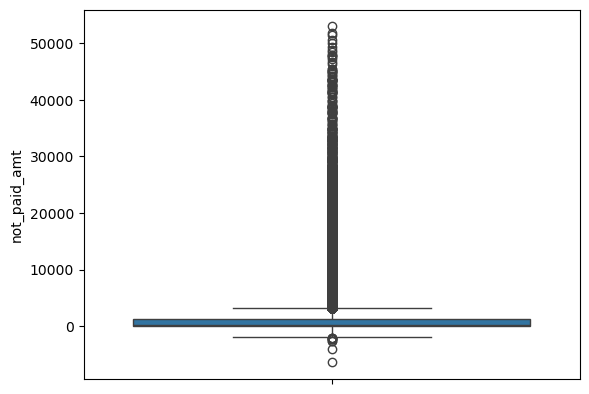

In [257]:
# Univariate analysis of not_paid_amt
df1['not_paid_amt'].describe()

sns.boxplot(df1['not_paid_amt'])